In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from tqdm import tqdm
import imutils

import warnings
warnings.filterwarnings("ignore")

In [2]:
# data = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training'
# No_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/notumor'

# glioma_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma'
# meningioma_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma'
# pituitary_tumor = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/pituitary'

In [3]:
# dirlist=[No_tumor, glioma_tumor, meningioma_tumor, pituitary_tumor]
# classes=['No', 'glioma', 'meningioma', 'pituitary']
# filepaths=[]
# labels=[]
# for i,j in zip(dirlist, classes):
#     filelist=os.listdir(i)
#     for f in filelist:
#         filepath=os.path.join (i,f)
#         filepaths.append(filepath)
#         labels.append(j)
# print ('filepaths:', len(filepaths), '   labels:', len(labels))

# # save the DataFrame as a CSV file
# filepath_df = pd.DataFrame({'filepath':filepaths, 'Label':labels})
# filepath_df
# filepath_df.to_csv('image_paths.csv', index=False)

filepaths: 5712    labels: 5712


In [45]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def image_process(path):
    
        
    frame1 = cv2.imread(path)
    
    frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(frame, (15, 15), 0)
    
    ret, thresh = cv2.threshold(blur, 175, 230, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    new_frame = cv2.drawContours(frame, contours, -1, (0,255,0), 3)

#     plt.imshow(new_frame)
    
    data_export = []
    
       
    if len(contours)>0:
        
        areas = [cv2.contourArea(c) for c in contours]
        max_index = np.argmax(areas)
        cnt=contours[max_index]
        
        
        #print('Contours - {}'.format(len(contours)))
            
        x, y, w, h = cv2.boundingRect(cnt)
        r = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #plt.imshow(r)
        
        area = cv2.contourArea(cnt)
        data_export.append(area)
#         print('Area - {}'.format(area))
        
        (x1, y1), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x1), int(y1))
        radius = int(radius)
        c = cv2.circle(frame, center, radius, (255, 0, 0), 2)
        #plt.imshow(c)
        
        perimeter = cv2.arcLength(cnt, True)
        data_export.append(perimeter)
#         print('Perimeter - {}'.format(perimeter))
        
        #aspect_ratio = float(w)/h
        #print('Aspect Ratio - {}'.format(aspect_ratio))
        
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        data_export.append(hull_area)
#         print('Convex Area - {}'.format(hull_area))
        if hull_area == 0 :
            solidity = 0
        else:
            solidity = float(area)/hull_area
        data_export.append(solidity)
#         print('Solidity - {}'.format(solidity))
        
        equi_diameter = np.sqrt(4*area/np.pi)
        data_export.append(equi_diameter)
#         print('Equivalent Diameter - {}'.format(equi_diameter))
        
        try:
            (x2,y2), (MA,ma), angle = cv2.fitEllipse(cnt)
        except:
            MA = 0
            ma = 0
        data_export.append(MA)
        data_export.append(ma)
        print('MA - {}'.format(MA))
#         print('Major Axis - {}'.format(MA))
#         print('Minor Axis - {}'.format(ma))
        
        #eccentricity = np.sqrt(1-(ma/MA)**2)
        if MA == 0 :
            eccentricity = 0
        else:
            eccentricity = (1-ma**2/MA**2)**(0.5)
        data_export.append(eccentricity)
#         print('Eccentricity - {}'.format(eccentricity))
                           
        return data_export
        
    else:
                
        print('No Tumor Found')
        for i in range(8):
            data_export.append(0)
        return data_export
    
data = pd.DataFrame(columns=['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis','Eccentricity','Class'])

for i in range(len(paths['filepath'])):
    if(paths['Label'][i] == 'No'):
        d = image_process(paths['filepath'][i])
        d.append(0)
        new_data = pd.DataFrame([d], columns=['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis','Eccentricity','Class'])
        data = data.append(new_data, ignore_index=True)
    elif(paths['Label'][i] == 'pituitary'):
        d = image_process(paths['filepath'][i])
        d.append(1)
        new_data = pd.DataFrame([d], columns=['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis','Eccentricity','Class'])
        data = data.append(new_data, ignore_index=True)
    elif(paths['Label'][i] == 'meningioma'):
        d = image_process(paths['filepath'][i])
        d.append(2)
        new_data = pd.DataFrame([d], columns=['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis','Eccentricity','Class'])
        data = data.append(new_data, ignore_index=True)
    else:
        d = image_process(paths['filepath'][i])
        d.append(3)
        new_data = pd.DataFrame([d], columns=['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis','Eccentricity','Class'])
        data = data.append(new_data, ignore_index=True)
# for i in neg_list:
#     d = image_process(i)
#     d.append(0)
#     new_data = pd.DataFrame([d], columns=['Area','Perimeter','Convex Area','Solidity','Equivalent Diameter','Major Axis','Minor Axis','Eccentricity','Class'])
#     data = data.append(new_data, ignore_index=True)

data
# data.to_csv('featured_dataset.csv')    

MA - 45.90223693847656
MA - 35.5789794921875
MA - 65.28264617919922
MA - 446.98699951171875
MA - 18.563322067260742
MA - 408.2989501953125
No Tumor Found
MA - 56.000160217285156
MA - 8.132515907287598
MA - 8.946353912353516
MA - 142.0017852783203
MA - 4.935081481933594
MA - 4.935081481933594
No Tumor Found
No Tumor Found
MA - 45.5879020690918
MA - 396.5759582519531
MA - 383.2227783203125
MA - 7.447428226470947
MA - 430.7643127441406
No Tumor Found
MA - 96.2779769897461
MA - 30.91576385498047
MA - 4.783851146697998
MA - 4.935081481933594
No Tumor Found
No Tumor Found
MA - 2.419734239578247
MA - 338.4089660644531
MA - 408.2989501953125
MA - 42.835723876953125
MA - 34.889801025390625
MA - 10.96674633026123
MA - 70.16995239257812
No Tumor Found
MA - 295.7835693359375
MA - 514.7362670898438
MA - 30.296154022216797
MA - 11.158559799194336
MA - 30.83074378967285
MA - 13.578801155090332
MA - 146.74339294433594
MA - 15.341880798339844
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found


No Tumor Found
MA - 19.030290603637695
MA - 8.575243949890137
No Tumor Found
No Tumor Found
MA - 6.020106792449951
MA - 21.687973022460938
No Tumor Found
MA - 6.766528129577637
No Tumor Found
MA - 11.49631118774414
MA - 2.2243571281433105
MA - 552.1996459960938
MA - 338.322998046875
MA - 70.6490478515625
MA - 478.88885498046875
MA - 470.78753662109375
MA - 619.119873046875
MA - 219.00497436523438
MA - 121.981689453125
MA - 6.844919681549072
MA - 18.546701431274414
MA - 292.1920166015625
MA - 55.821353912353516
MA - 9.562058448791504
MA - 224.62362670898438
MA - 56.760581970214844
MA - 7.759664535522461
MA - 13.452829360961914
MA - 290.64276123046875
MA - 25.62762451171875
MA - 0
MA - 6.024799823760986
MA - 73.20451354980469
MA - 289.07916259765625
MA - 116.85072326660156
MA - 3.08561372756958
MA - 310.1060485839844
MA - 5.014123916625977
MA - 209.8751220703125
MA - 424.42578125
MA - 301.77490234375
MA - 257.01483154296875
MA - 51.64348602294922
MA - 103.90521240234375
No Tumor Found
MA

MA - 3.7808749675750732
No Tumor Found
MA - 11.192490577697754
MA - 72.27557373046875
MA - 31.224079132080078
MA - 329.5059509277344
MA - 303.29779052734375
MA - 27.875600814819336
MA - 2.473677158355713
MA - 423.5274963378906
MA - 300.6330261230469
MA - 259.132568359375
MA - 46.052215576171875
No Tumor Found
MA - 205.94863891601562
MA - 12.119617462158203
MA - 248.21165466308594
MA - 316.93328857421875
MA - 308.26104736328125
MA - 128.92950439453125
MA - 144.1505889892578
MA - 28.02350616455078
MA - 13.730219841003418
MA - 18.273433685302734
MA - 323.4892883300781
MA - 8.498934745788574
No Tumor Found
MA - 303.2816162109375
MA - 27.78194808959961
MA - 234.891845703125
MA - 4.6350417137146
No Tumor Found
MA - 41.57201385498047
MA - 40.01739501953125
MA - 13.968043327331543
MA - 29.99627685546875
MA - 7.84053897857666
MA - 25.91687774658203
MA - 5.492868423461914
MA - 87.05928039550781
MA - 0
No Tumor Found
MA - 75.3604736328125
No Tumor Found
MA - 814.3363647460938
No Tumor Found
MA - 

MA - 27.509517669677734
MA - 35.1790885925293
MA - 26.99378204345703
No Tumor Found
MA - 187.9766845703125
MA - 112.81063842773438
MA - 424.4564208984375
MA - 301.7955322265625
MA - 64.81565856933594
MA - 57.787532806396484
MA - 222.59854125976562
MA - 257.05291748046875
MA - 308.3707275390625
MA - 50.964046478271484
MA - 2.594822645187378
MA - 240.1898651123047
MA - 220.27996826171875
MA - 40.99608612060547
MA - 56.226627349853516
MA - 19.38210678100586
MA - 61.90290451049805
MA - 45.4296989440918
MA - 34.03718185424805
MA - 21.524293899536133
MA - 7.782415390014648
MA - 5.005064964294434
MA - 3.1664977073669434
MA - 93.22225952148438
MA - 290.80755615234375
MA - 25.673194885253906
MA - 58.014076232910156
MA - 232.73483276367188
MA - 26.27404022216797
MA - 121.51553344726562
MA - 65.53024291992188
MA - 154.17596435546875
MA - 71.7330322265625
MA - 133.6900634765625
MA - 42.114540100097656
MA - 114.291748046875
MA - 55.36708068847656
MA - 19.42386817932129
MA - 45.42389678955078
MA - 9

No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
MA - 8.86069107055664
No Tumor Found
MA - 2.42634654045105
MA - 2.749183177947998
MA - 2.7821028232574463
No Tumor Found
MA - 2.383248805999756
MA - 35.501800537109375
MA - 3.1679489612579346
No Tumor Found
No Tumor Found
MA - 0
No Tumor Found
MA - 0
MA - 6.2609543800354
No Tumor Found
MA - 5.950830459594727
No Tumor Found
MA - 7.594452381134033
MA - 6.289057731628418
MA - 5.0102009773254395
MA - 4.275121688842773
No Tumor Found
MA - 3.0950822830200195
MA - 11.575143814086914
No Tumor Found
No Tumor Found
No Tumor Found
MA - 5.403822422027588
MA - 2.9946298599243164
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
MA - 6.546073913574219
MA - 4.415152072906494
MA - 11.183989524841309
MA - 4.430898189544678
MA - 1.0006670951843262
No Tumor Found
No Tumor Found
MA - 4.383900165557861
No Tumor Found
No Tumor Found
No Tumor Found
MA - 1.8236292600631714
No Tumor Found
No Tumor Found
No Tumor Found
MA - 0
MA - 2.201542615

MA - 2.6924540996551514
MA - 3.57258939743042
MA - 6.847201347351074
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
MA - 0
MA - 50.90373611450195
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
No Tumor Found
MA - 3.1148452758789062
MA - 102.6187515258789
No Tumor Found
MA - 6.787171363830566
No Tumor Found
MA - 5.161075592041016
MA - 0
MA - 2.6832356452941895
MA - 0
MA - 0
MA - 4.318964958190918
MA - 2.262741804122925
MA - 4.972637176513672
MA - 3.4164304733276367
MA - 6.2876410484313965
No Tumor Found
MA - 2.612253427505493
MA - 2.4230809211730957
MA - 4.137541770935059
MA - 5.000523090362549
MA - 2.6482105255126953
No Tumor Found
No Tumor Found
MA - 3.0588419437408447
MA - 0
MA - 2.3112292289733887
MA - 0
MA - 8.342999458312988
MA - 14.453492164611816
MA - 6.842855453491211
MA - 2.971876859664917
MA - 5.950830459594727
MA - 8.686371803283691
MA - 4.207099437713623
MA - 4.783947467803955
MA - 2.1188201904296875
No 

MA - 3.337423324584961
No Tumor Found
MA - 3.2022311687469482
No Tumor Found
No Tumor Found
MA - 22.942277908325195
MA - 679.5089111328125
MA - 9.752645492553711
MA - 25.476499557495117
MA - 4.64912748336792
MA - 58.93185806274414
MA - 60.62588119506836
MA - 190.76409912109375
MA - 3.2349870204925537
MA - 3.4455857276916504
MA - 16.596981048583984
MA - 6.091545104980469
MA - 9.990357398986816
MA - 12.107575416564941
MA - 7.075015544891357
MA - 3.146951675415039
MA - 9.185600280761719
MA - 22.48550033569336
MA - 1.091840147972107
MA - 3.5442190170288086
No Tumor Found
MA - 3.529378890991211
MA - 44.49167251586914
MA - 236.36093139648438
MA - 202.89585876464844
MA - 156.5470733642578
MA - 0
MA - 7.178142070770264
MA - 175.6406707763672
MA - 0
MA - 256.3727722167969
MA - 5.572123050689697
MA - 1.0
No Tumor Found
MA - 2.7569589614868164
No Tumor Found
MA - 1.4534947872161865
MA - 18.570213317871094
No Tumor Found
No Tumor Found
MA - 0
MA - 8.958800315856934
MA - 15.810543060302734
MA - 4.5

MA - 302.2450256347656
MA - 23.361835479736328
MA - 2.226854085922241
MA - 2.5191571712493896
MA - 0
MA - 3.4156503677368164
No Tumor Found
MA - 55.691871643066406
MA - 31.527130126953125
MA - 4.121114730834961
MA - 2.577991485595703
No Tumor Found
MA - 0
MA - 148.07757568359375
MA - 2.595313549041748
MA - 3.4406707286834717
MA - 5.221629619598389
MA - 3.858969211578369
MA - 278.3180847167969
MA - 48.458641052246094
MA - 12.902108192443848
MA - 5.697089195251465
MA - 4.874413013458252
No Tumor Found
MA - 3.588259696960449
No Tumor Found
MA - 354.3467102050781
MA - 358.35662841796875
MA - 92.68708038330078
MA - 16.434404373168945
MA - 3.8200347423553467
No Tumor Found
MA - 7.6635308265686035
MA - 1344.275390625
MA - 22.853206634521484
MA - 477.0931091308594
MA - 21.93351936340332
MA - 2.654477119445801
MA - 0
No Tumor Found
MA - 14.887248992919922
MA - 16.589109420776367
MA - 11.588682174682617
MA - 3.682286262512207
MA - 21.39264488220215
MA - 4.452687740325928
MA - 39.57471466064453
M

MA - 315.32928466796875
MA - 9.825274467468262
MA - 331.98712158203125
MA - 26.518434524536133
MA - 406.1957702636719
MA - 87.55883026123047
MA - 54.27071762084961
MA - 23.086933135986328
MA - 6.433290958404541
MA - 144.57508850097656
MA - 51.11448669433594
MA - 117.55844116210938
MA - 386.9377136230469
MA - 64.31316375732422
MA - 5.905936241149902
MA - 321.4205322265625
MA - 240.77102661132812
MA - 116.01212310791016
MA - 432.7152099609375
MA - 164.7598419189453
MA - 430.1849060058594
MA - 456.9473571777344
MA - 290.1817321777344
MA - 695.3881225585938
MA - 361.68988037109375
MA - 3.351595163345337
MA - 166.707763671875
MA - 154.33218383789062
MA - 475.14788818359375
MA - 124.80335235595703
MA - 502.77960205078125
MA - 97.81845092773438
MA - 46.282283782958984
MA - 20.3658447265625
MA - 16.52544403076172
MA - 422.0042724609375
MA - 3.564394235610962
MA - 365.4521789550781
MA - 71.07344818115234
MA - 192.47903442382812
MA - 248.1788330078125
MA - 6.9891357421875
MA - 8.741961479187012


MA - 3.499431610107422
MA - 124.75614929199219
MA - 2.257930040359497
MA - 4.076256275177002
MA - 6.262455463409424
MA - 10.500996589660645
MA - 27.164880752563477
MA - 9.374186515808105
MA - 12.289548873901367
MA - 10.404500007629395
MA - 139.52902221679688
MA - 16.014394760131836
MA - 1.2495431900024414
MA - 1.9013285636901855
MA - 141.77487182617188
MA - 3.5575413703918457
MA - 23.674617767333984
No Tumor Found
MA - 28.91391372680664
MA - 3.2247238159179688
MA - 20.459701538085938
MA - 16.463651657104492
MA - 193.59141540527344
MA - 58.696937561035156
MA - 177.96884155273438
MA - 6.288538455963135
MA - 44.434326171875
MA - 6.781980514526367
MA - 6.329524040222168
MA - 5.830076694488525
MA - 4.573789119720459
MA - 12.10084342956543
MA - 4.592606067657471
MA - 6.385670185089111
MA - 41.030731201171875
MA - 78.4439468383789
MA - 11.416690826416016
MA - 316.9307556152344
MA - 18.71356201171875
MA - 6.041083335876465
MA - 404.38385009765625
MA - 10.200333595275879
MA - 145.42845153808594

MA - 644.6929931640625
MA - 19.651187896728516
MA - 116.82723236083984
MA - 476.38287353515625
MA - 451.59375
MA - 1194.3709716796875
MA - 166.24038696289062
MA - 254.44117736816406
MA - 238.35682678222656
MA - 7.797957420349121
MA - 463.579345703125
MA - 208.15318298339844
MA - 4.439280986785889
MA - 184.3475799560547
MA - 133.832275390625
MA - 15.975221633911133
MA - 3.8719451427459717
MA - 7.876699924468994
MA - 2.9965507984161377
MA - 4.750241279602051
MA - 5.240067005157471
MA - 9.8793363571167
MA - 7.029484272003174
MA - 21.11482810974121
No Tumor Found
MA - 9.41862964630127
MA - 2.1593477725982666
MA - 5.073318958282471
No Tumor Found
MA - 247.78469848632812
MA - 214.58489990234375
MA - 3.3784542083740234
MA - 9.573901176452637
MA - 2.9655587673187256
MA - 8.827969551086426
MA - 63.070980072021484
MA - 7.6730122566223145
MA - 335.12628173828125
MA - 28.018911361694336
MA - 248.24465942382812
MA - 6.06472635269165
MA - 183.71115112304688
MA - 948.427001953125
MA - 45.973960876464

MA - 0
No Tumor Found
MA - 5.342533111572266
MA - 60.84760665893555
MA - 4.044896602630615
MA - 598.6148681640625
MA - 5.310464859008789
MA - 4.703500270843506
MA - 4.940280914306641
No Tumor Found
MA - 7.038166046142578
MA - 6.884598731994629
MA - 6.337502956390381
No Tumor Found
No Tumor Found
No Tumor Found
MA - 6.807301044464111
MA - 5.95852518081665
MA - 6.298679351806641
MA - 6.298679351806641
No Tumor Found
MA - 5.651715278625488
No Tumor Found
No Tumor Found
No Tumor Found
MA - 1.7363314628601074
No Tumor Found
No Tumor Found
MA - 6.588729381561279
MA - 0.0
MA - 2.851315498352051
No Tumor Found
No Tumor Found
MA - 1.8079115152359009
MA - 2.850447416305542
MA - 7.934215545654297
MA - 11.494911193847656
MA - 6.712034225463867
No Tumor Found
MA - 4.222193241119385
MA - 5.835150718688965
MA - 5.835150718688965
MA - 19.409088134765625
MA - 5.630155563354492
MA - 5.150271415710449
MA - 393.68804931640625
MA - 82.5549545288086
MA - 6.176961421966553
MA - 122.7724609375
MA - 3.87744307

MA - 7.370033264160156
MA - 1277.1116943359375
MA - 0
No Tumor Found
MA - 15.783817291259766
MA - 3.0083441734313965
MA - 38.91667175292969
MA - 6.8338470458984375
MA - 0.0
MA - 2.6513054370880127
MA - 4.155896186828613
MA - 6.060617923736572
MA - 4.4359283447265625
MA - 4.545708179473877
MA - 2.7172324657440186
No Tumor Found
No Tumor Found
MA - 4.137482166290283
MA - 7.468570232391357
MA - 2.8852322101593018
MA - 6.675323486328125
MA - 5.9742817878723145
MA - 3.07580304145813
MA - 1.4814743995666504
MA - 4.590578556060791
MA - 7.346437931060791
MA - 64.75015258789062
MA - 10.129899024963379
MA - 284.9130859375
MA - 13.565333366394043
MA - 3.5689361095428467
MA - 2.9089226722717285
MA - 5.412542343139648
MA - 3.376746892929077
MA - 3.408747911453247
MA - 3.403808832168579
MA - 6.963396072387695
MA - 4.175625324249268
MA - 163.1610870361328
MA - 4.517634391784668
MA - 9.412805557250977
MA - 11.677983283996582
MA - 1067.1903076171875
MA - 9.80672836303711
MA - 5.039228439331055
MA - 21.

MA - 2.981783866882324
MA - 4.332408905029297
No Tumor Found
MA - 4.542967319488525
MA - 5.125332832336426
No Tumor Found
No Tumor Found
No Tumor Found
MA - 2.995846748352051
MA - 0
MA - 7.378718376159668
No Tumor Found
MA - 5.125565052032471
No Tumor Found
MA - 5.614597320556641
No Tumor Found
MA - 1.325952172279358
MA - 88.88667297363281
MA - 325.1071472167969
No Tumor Found
MA - 11.12993335723877
MA - 4.962391376495361
No Tumor Found
MA - 3.997331142425537
MA - 1.7709826231002808
MA - 6.35625696182251
No Tumor Found
MA - 6.102116584777832
No Tumor Found
MA - 6.468314170837402
No Tumor Found
MA - 4.579463958740234
MA - 2.343845844268799
MA - 2.62088680267334
MA - 1.5899102687835693
MA - 2.29032301902771
MA - 0
MA - 156.34779357910156
MA - 293.39154052734375
MA - 162.9717559814453
MA - 4.046834468841553
MA - 4.1420087814331055
MA - 7.847649097442627
MA - 0
MA - 6.959633827209473
MA - 4.788610935211182
MA - 3.0672404766082764
MA - 7.535106658935547
MA - 67.9710693359375
MA - 10.5178432

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,1456.5,281.521859,2786.5,0.522699,43.063597,45.902237,79.854164,0.000000+1.423519j,0
1,1136.5,127.154328,1159.0,0.980587,38.039936,35.578979,41.199059,0.000000+0.583843j,0
2,520.5,304.894442,1437.5,0.362087,25.743372,65.282646,127.809006,0.000000+1.683122j,0
3,207284.0,1746.361601,208492.5,0.994204,513.733575,446.987000,598.894897,0.000000+0.891737j,0
4,828.5,186.551297,1122.0,0.738414,32.478900,18.563322,75.990356,0.000000+3.969554j,0
...,...,...,...,...,...,...,...,...,...
5707,6.0,13.656854,8.0,0.750000,2.763953,1.995512,5.909304,0.000000+2.787344j,1
5708,39.5,35.556349,45.0,0.877778,7.091753,3.670089,15.640107,0.000000+4.142515j,1
5709,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000+0.000000j,1
5710,2.5,6.242641,2.5,1.000000,1.784124,1.632993,2.828427,0.000000+1.414213j,1


In [46]:
data.shape

(5712, 9)

In [48]:
data.to_csv('featured_dataset.csv', index=False) 

In [3]:
paths = pd.read_csv('image_paths.csv')
paths.head()

,filepath,Label
0,C:/Users/Lenovo/Documents/MyProjects/Machine l...,No
1,C:/Users/Lenovo/Documents/MyProjects/Machine l...,No
2,C:/Users/Lenovo/Documents/MyProjects/Machine l...,No
3,C:/Users/Lenovo/Documents/MyProjects/Machine l...,No
4,C:/Users/Lenovo/Documents/MyProjects/Machine l...,No


In [30]:
paths['Label'].value_counts()

No            1595
pituitary     1457
meningioma    1339
glioma        1321
Name: Label, dtype: int64

In [7]:
# rgb_images_array = []
# gray_images_array = []

# for i in paths['filepath']:
#     #reading the image
#     img = imread(i)
#     rgb_images_array.append(img)
#     image = imread(i, cv2.IMREAD_GRAYSCALE)
#     gray_images_array.append(image)

# images_df = pd.DataFrame({'gray_img':gray_images_array, 'rgb_img':rgb_images_array, 'Label':paths['Label']})
# images_df
# images_df.to_csv('image_arr.csv', index=False)

In [8]:
images = pd.read_csv('image_arr.csv')
images.head()

,gray_img,rgb_img,Label
0,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,No
1,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,No
2,[[[6 6 6]\n [6 6 6]\n [6 6 6]\n ...\n [6 6...,[[[6 6 6]\n [6 6 6]\n [6 6 6]\n ...\n [6 6...,No
3,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,[[[0 0 0]\n [0 0 0]\n [0 0 0]\n ...\n [0 0...,No
4,[[[10 10 10]\n [10 10 10]\n [10 10 10]\n .....,[[[10 10 10]\n [10 10 10]\n [10 10 10]\n .....,No


In [49]:
# imshow(images['gray_img'][0])

In [77]:
# Files=pd.Series(filepaths, name='filepaths')
# Label=pd.Series(labels, name='labels')
# df=pd.concat([Files,Label], axis=1)
# df=pd.DataFrame(np.array(df), columns = ['filepaths', 'labels'])
# df

In [78]:
print(df['labels'].value_counts())

No            1595
pituitary     1457
meningioma    1339
glioma        1321
Name: labels, dtype: int64


In [79]:
# #visualize brain tumor images

# plt.figure(figsize=(20,10))
# for i in range(15):
#     random = np.random.randint(1,len(df))
#     print(df['filepaths'][i])
#     plt.subplot(3,5,i+1)
#     plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
#     plt.title(df.loc[random, "labels"], size = 15, color = "white") 
#     plt.xticks([])
#     plt.yticks([])
    
# plt.show()

In [80]:
images_array = []
for i in filepaths:
    #reading the image 
    image = imread(i, as_gray=True)
    images_array.append(image)
    
images_array



[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        ...,
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [0.02352941, 0.02352941, 0.02352941, ..., 0.02352941, 0.02352941,
         0.02352941],
        [

In [81]:
images = pd.Series(images_array, name='image')
Label = pd.Series(labels, name='labels')
df=pd.concat([images,Label], axis=1)
df=pd.DataFrame(np.array(df), columns = ['image', 'labels'])
df

,image,labels
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",No
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00...",No
2,"[[0.023529411764705882, 0.023529411764705882, ...",No
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",No
4,"[[0.0392156862745098, 0.0392156862745098, 0.03...",No
...,...,...
5707,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",pituitary
5708,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",pituitary
5709,"[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...",pituitary
5710,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",pituitary


In [82]:
pca = PCA(n_components=6) # we need 2 principal components.
converted_data = pca.fit(image)

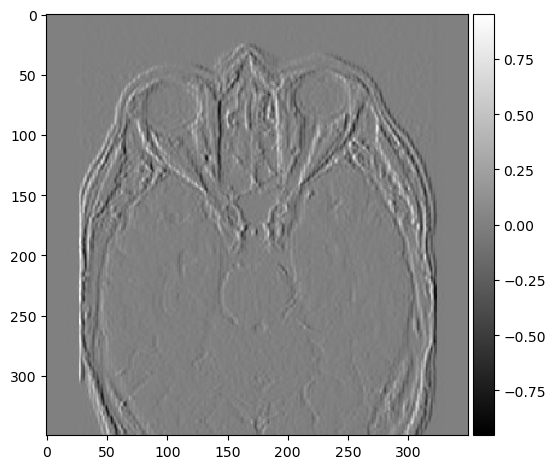

In [83]:
#reading the image 
image = imread(filepaths[0], as_gray=True)
# print(image)
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

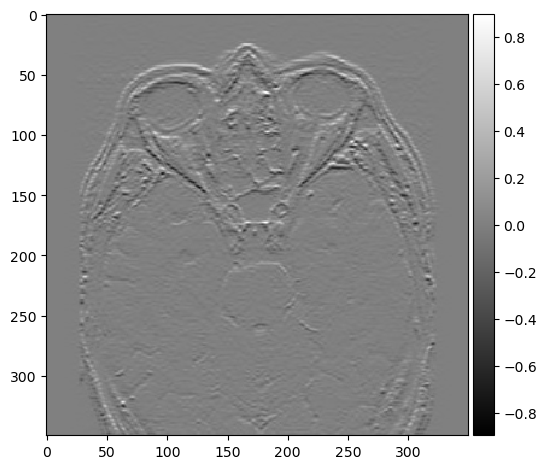

In [84]:
imshow(edges_prewitt_horizontal, cmap='gray')

In [85]:
# # Load the image in grayscale
# img = imread(filepaths[0], cv2.IMREAD_GRAYSCALE)

# # Divide the image into 8x8 blocks
# blocks = [img[j:j+8, i:i+8] for (j, i) in np.ndindex(img.shape[0]//8, img.shape[1]//8)]

# # Apply the DCT to each block
# dct_blocks = [cv2.dct(np.float32(block)) for block in blocks]

# # Keep only the most significant DCT coefficients
# kept_coeffs = [block[:4, :4].flatten() for block in dct_blocks]

# # Concatenate all feature vectors
# features = np.concatenate(kept_coeffs)

# print(features.shape)

In [86]:
# def crop_img(img):
#     """
#     Finds the extreme points on the image and crops the rectangular out of them
#     """
# #     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray = cv2.GaussianBlur(img, (3, 3), 0)

#     # threshold the image, then perform a series of erosions +
#     # dilations to remove any small regions of noise
#     thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thresh = cv2.erode(thresh, None, iterations=2)
#     thresh = cv2.dilate(thresh, None, iterations=2)

#     # find contours in thresholded image, then grab the largest one
#     cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     cnts = imutils.grab_contours(cnts)
#     c = max(cnts, key=cv2.contourArea)

#     # find the extreme points
#     extLeft = tuple(c[c[:, :, 0].argmin()][0])
#     extRight = tuple(c[c[:, :, 0].argmax()][0])
#     extTop = tuple(c[c[:, :, 1].argmin()][0])
#     extBot = tuple(c[c[:, :, 1].argmax()][0])
#     ADD_PIXELS = 0
#     new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    
#     return new_img

In [87]:
# new_img = crop_img(image)

# imshow(new_img, cmap='gray')

In [88]:
#Import required modules
from sklearn.decomposition import PCA

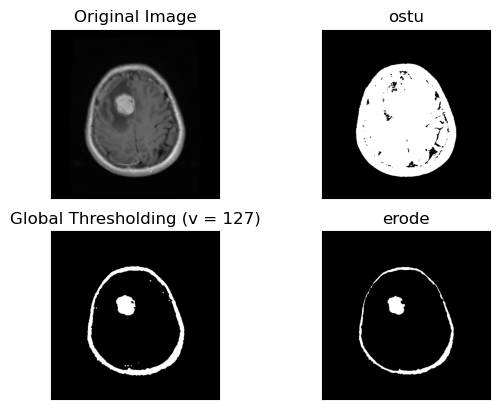

In [130]:
# file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0032.jpg'
file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0019.jpg'
image = imread(file)
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img = cv2.medianBlur(image,5)
# Convert the grayscale image to binary
# ret, binary = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret,th1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
thresh = cv2.erode(th1, None, iterations=2)
# cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# pca = PCA(n_components=6) # we need 2 principal components.
# converted_data = pca.fit(image)

# th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
# th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'ostu','Global Thresholding (v = 127)', 'erode' ]
images = [img, binary,th1, thresh ]
for i in range(len(images)):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

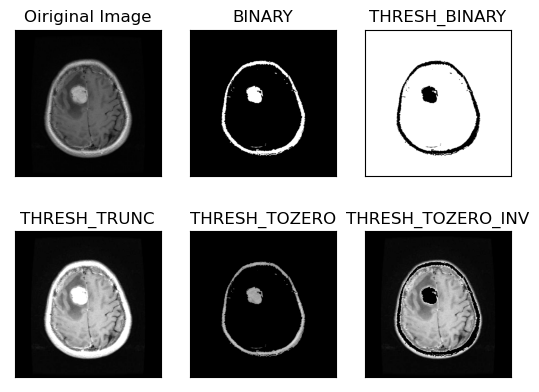

In [112]:
ret,thresh_binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
 
ret,thresh_binary_inv = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
 
ret,thresh_trunc = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
 
ret,thresh_tozero = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
 
ret,thresh_tozero_inv = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)
#DISPLAYING THE DIFFERENT THRESHOLDING STYLES using OpenCV
 
    
names = ['Oiriginal Image','BINARY','THRESH_BINARY','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
 
images = gray,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv
 
for i in range(6):
 
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
 
    plt.title(names[i])
 
    plt.xticks([]),plt.yticks([])

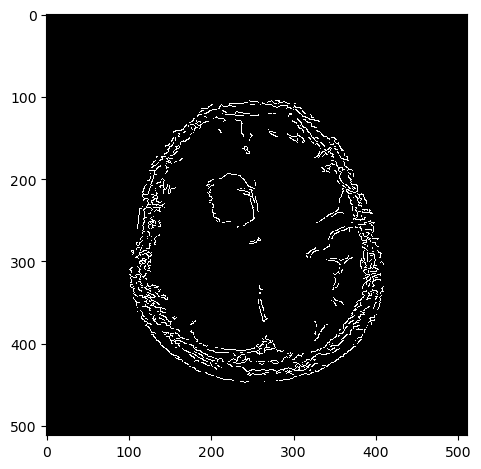

In [113]:
#calculate the edges using Canny edge algorithm
 
edges_of_image = cv2.Canny(image,100,200) 
 
#plot the edges
 
imshow(edges_of_image)

In [124]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from scipy import ndimage as nd
from skimage.filters import sobel

In [50]:
# # file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0032.jpg'
# file = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0019.jpg'
# image = imread(file)
# assert img is not None, "file could not be read, check with os.path.exists()"
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# entropy_img = entropy(image, disk(1))
# imshow(entropy_img)
# print(entropy_img)
# entropy1 = entropy_img.reshape(-1)
# print(entropy1)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[0 0 0 ... 0 0 0]


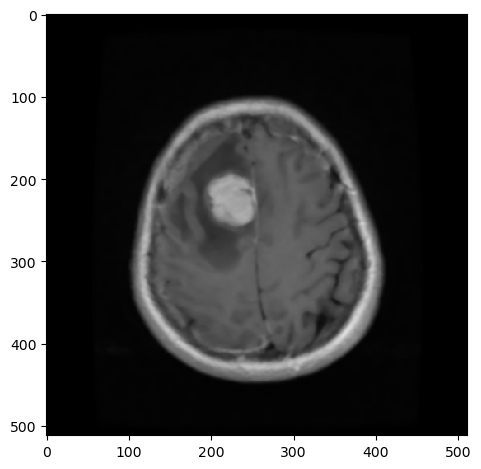

In [133]:
gaussian_img = nd.gaussian_filter(img, sigma=1)
imshow(gaussian_img)
print(gaussian_img)
gaussian_img1 = gaussian_img.reshape(-1)
print(gaussian_img1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


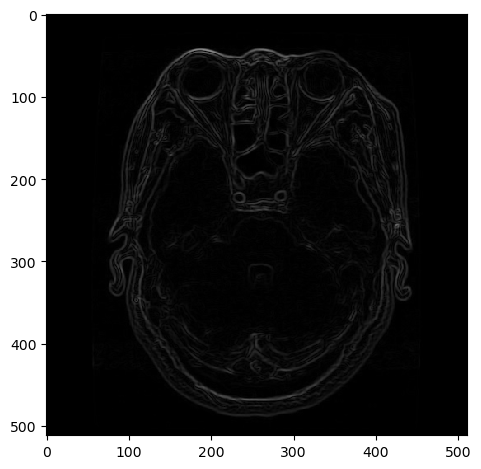

In [125]:
sobel_img = sobel(img)
imshow(sobel_img)
print(sobel_img)
sobel1 = sobel_img.reshape (-1)

## Find Contour & NB

In [12]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def image_process(path):
    
        
    frame1 = cv2.imread(path)
    
    frame = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(frame, (15, 15), 0)
    
    ret, thresh = cv2.threshold(blur, 175, 230, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    new_frame = cv2.drawContours(frame, contours, -1, (0,255,0), 3)

    plt.imshow(new_frame)
    
    data_export = []
    
       
    if len(contours)>0:
        
        areas = [cv2.contourArea(c) for c in contours]
        max_index = np.argmax(areas)
        cnt=contours[max_index]
        
        
        #print('Contours - {}'.format(len(contours)))
            
        x, y, w, h = cv2.boundingRect(cnt)
        r = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #plt.imshow(r)
        
        area = cv2.contourArea(cnt)
        data_export.append(area)
        print('Area - {}'.format(area))
        
        (x1, y1), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x1), int(y1))
        radius = int(radius)
        c = cv2.circle(frame, center, radius, (255, 0, 0), 2)
        #plt.imshow(c)
        
        perimeter = cv2.arcLength(cnt, True)
        data_export.append(perimeter)
        print('Perimeter - {}'.format(perimeter))
        
        #aspect_ratio = float(w)/h
        #print('Aspect Ratio - {}'.format(aspect_ratio))
        
        hull = cv2.convexHull(cnt)
        hull_area = cv2.contourArea(hull)
        data_export.append(hull_area)
        print('Convex Area - {}'.format(hull_area))
        
        solidity = float(area)/hull_area
        data_export.append(solidity)
        print('Solidity - {}'.format(solidity))
        
        equi_diameter = np.sqrt(4*area/np.pi)
        data_export.append(equi_diameter)
        print('Equivalent Diameter - {}'.format(equi_diameter))
        
        try:
            (x2,y2), (MA,ma), angle = cv2.fitEllipse(cnt)
        except:
            MA = 0
            ma = 0
        data_export.append(MA)
        data_export.append(ma)
        print('Major Axis - {}'.format(MA))
        print('Minor Axis - {}'.format(ma))
        
        #eccentricity = np.sqrt(1-(ma/MA)**2)
        eccentricity = (1-ma**2/MA**2)**(0.5)
        data_export.append(eccentricity)
        print('Eccentricity - {}'.format(eccentricity))
                           
        return data_export
        
    else:
                
        print('No Tumor Found')
        for i in range(8):
            data_export.append(0)
        return data_export

In [23]:
file1 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0020.jpg'
file2 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0016.jpg'
file3 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/notumor/Tr-no_0018.jpg'
file4 = 'C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/pituitary/Tr-pi_0029.jpg'

# image = imread(file)

C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/glioma/Tr-gl_0020.jpg
Area - 444.5
Perimeter - 220.5269113779068
Convex Area - 647.5
Solidity - 0.6864864864864865
Equivalent Diameter - 23.789808272341748
Major Axis - 8.794244766235352
Minor Axis - 98.9925537109375
Eccentricity - (6.86537542404585e-16+11.212008929963792j)


[444.5,
 220.5269113779068,
 647.5,
 0.6864864864864865,
 23.789808272341748,
 8.794244766235352,
 98.9925537109375,
 (6.86537542404585e-16+11.212008929963792j)]

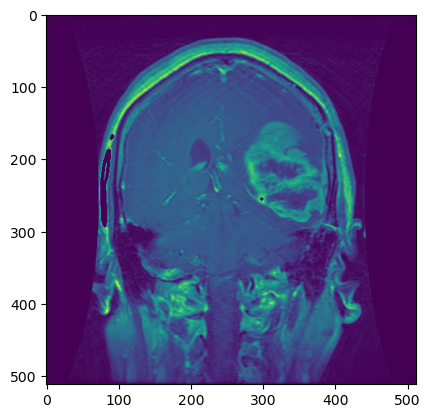

In [25]:
image_process(file1)



C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/meningioma/Tr-me_0016.jpg
Area - 6.5
Perimeter - 12.242640614509583
Convex Area - 7.0
Solidity - 0.9285714285714286
Equivalent Diameter - 2.876813695875796
Major Axis - 2.387620687484741
Minor Axis - 6.286083698272705
Eccentricity - (1.4912983595995702e-16+2.43547504576482j)


[6.5,
 12.242640614509583,
 7.0,
 0.9285714285714286,
 2.876813695875796,
 2.387620687484741,
 6.286083698272705,
 (1.4912983595995702e-16+2.43547504576482j)]

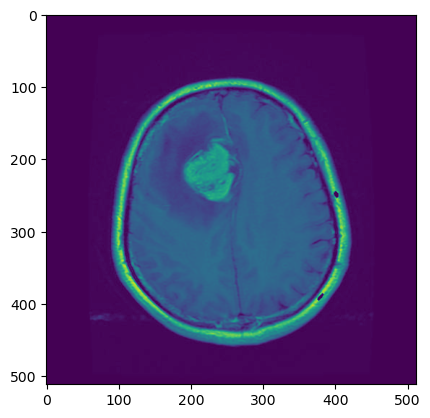

In [26]:
image_process(file2)

C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/notumor/Tr-no_0018.jpg
Area - 204.0
Perimeter - 139.88224947452545
Convex Area - 322.0
Solidity - 0.6335403726708074
Equivalent Diameter - 16.11647812414279
Major Axis - 7.447428226470947
Minor Axis - 60.1240348815918
Eccentricity - (4.905294499417027e-16+8.010953856789213j)


[204.0,
 139.88224947452545,
 322.0,
 0.6335403726708074,
 16.11647812414279,
 7.447428226470947,
 60.1240348815918,
 (4.905294499417027e-16+8.010953856789213j)]

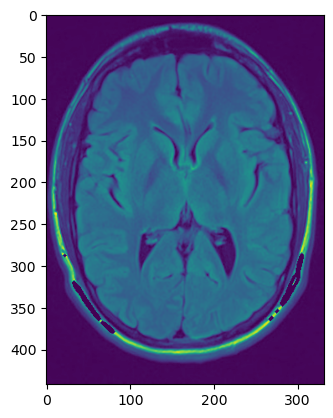

In [27]:
image_process(file3)

C:/Users/Lenovo/Documents/MyProjects/Machine learning/Brain Tumor Detection/dataset/Training/pituitary/Tr-pi_0029.jpg
Area - 2472.0
Perimeter - 328.65180230140686
Convex Area - 3093.0
Solidity - 0.7992240543161979
Equivalent Diameter - 56.10212254973356
Major Axis - 29.927274703979492
Minor Axis - 145.71347045898438
Eccentricity - (2.9177945852745206e-16+4.765120175557561j)


[2472.0,
 328.65180230140686,
 3093.0,
 0.7992240543161979,
 56.10212254973356,
 29.927274703979492,
 145.71347045898438,
 (2.9177945852745206e-16+4.765120175557561j)]

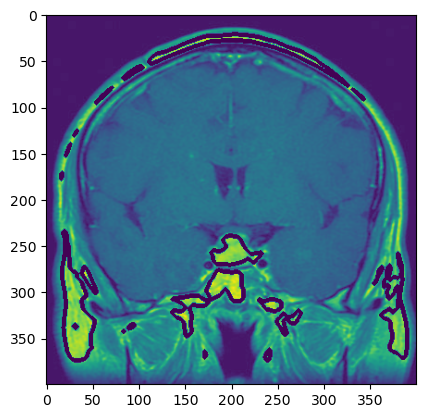

In [28]:
image_process(file4)